1920 - Ungen förbjöds att vara med pga sin roll och inblandning i första världskriget.  
  

1984 - Ungern bojkottade OS 1984 i Los Angeles, tillsammans med andra öststatländer, som svar på den USA-ledda bojkotten av OS i Moskva 1980. Bojkotten var en politisk handling som genomfördes på Sovjetunionens begäran. 
Orsak: Bojkotten var en vedergällning för den bojkott som USA och andra länder genomförde mot OS i Moskva 1980.
Beslut: Ungern deltog inte eftersom de, likt andra socialistiska länder, följde Sovjetunionens beslut.  
  
(1980 - USA ledde en bojkott av de Olympiska spelen i Moskva som en protest mot Sovjets invasion av Afghanistan. Ytterligare 60 länder deltog i bojkotten, bland annat Kina.)  
  
1984 - Som en följd av det Kalla kriget bojkottade Sovjet och många andra länder i östblocket de Olympiska spelen i Los Angeles.  

In [50]:
import pandas as pd

# Ladda in data
athletes = pd.read_csv("../athlete_events.csv")
noc = pd.read_csv("../noc_regions.csv")


In [51]:

# Slå ihop dataset för att få regionnamn
data = pd.merge(athletes, noc, on="NOC", how="left")


**Sorterar alla unika deltagare** (all, Hungary & Sweden) genom att ta bort dubbletter utifrån ID, Year och Sport. Då får vi ut antal unika deltaganden, även om det skett av samma person, vid olika årtal och sporter. 

In [88]:
all_unique = (
    data.drop_duplicates(subset=["ID", "Year", "Sport"])
)

hungary_unique = (
    data[data["NOC"] == "HUN"]
    .drop_duplicates(subset=["ID", "Year", "Sport"])
)

sweden_unique = (
    data[data["NOC"] == "SWE"]
    .drop_duplicates(subset=["ID", "Year", "Sport"])
)

print(f"{len(all_unique)}")
print(f"{len(hungary_unique)}")
print(f"{len(sweden_unique)}")

188169
4141
5474


Sorterar utifrån Season "Winter": 

In [85]:
winter_all = all_unique[all_unique["Season"] == "Winter"]
winter_hungary = hungary_unique[hungary_unique["Season"] == "Winter"]
winter_sweden = sweden_unique[sweden_unique["Season"] == "Winter"]

print(f"{len(winter_all)}")
print(f"{len(winter_hungary)}")
print(f"{len(winter_sweden)}")

28920
284
1399


Alla deltagare för alla länder, Ungern och Sverige i tennis: 

In [89]:
tennis_all = all_unique[all_unique["Sport"] == "Tennis"]
tennis_hungary = hungary_unique[hungary_unique["Sport"] == "Tennis"] 
tennis_sweden = sweden_unique[sweden_unique["Sport"] == "Tennis"] 

print(f"{len(tennis_all)}")
print(f"{len(tennis_hungary)}")
print(f"{len(tennis_sweden)}")

1814
37
63


Diagram över könsfördelningen i tennis (alla länder, Ungern och Sverige):

In [ ]:

import plotly.express as px
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"  # Tillfälligt, får inte upp i nb.

# Lägg till en kolumn som talar om grupp
all_group = tennis_all.assign(Group="Alla länder")
hun_group = tennis_hungary.assign(Group="Ungern")
swe_group = tennis_sweden.assign(Group="Sverige")

# Slå ihop
tennis_combined = pd.concat([all_group, hun_group, swe_group])

# Gör cirkeldiagram
fig = px.pie(
    tennis_combined,
    names="Sex",
    facet_col="Group",        # en subplot per grupp
    category_orders={"Group": ["Alla länder", "Ungern", "Sverige"]},  # ordning
    title="Könsfördelning i tennis – jämförelse"
)

fig.show()


Var och en försig: 

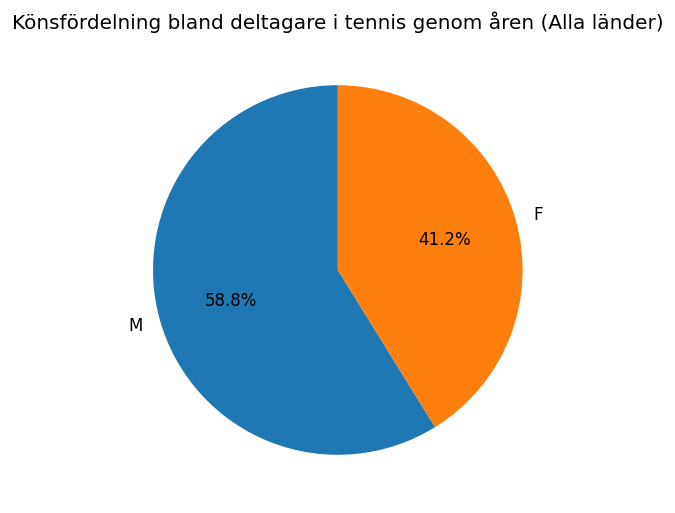

In [73]:
gender_counts_tennis_all = tennis_all['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts_tennis_all.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare i tennis genom åren (Alla länder)")
plt.ylabel("")  # ta bort y-etikett
plt.show()

Diagram över könsfördelningen i tennis (Ungern):

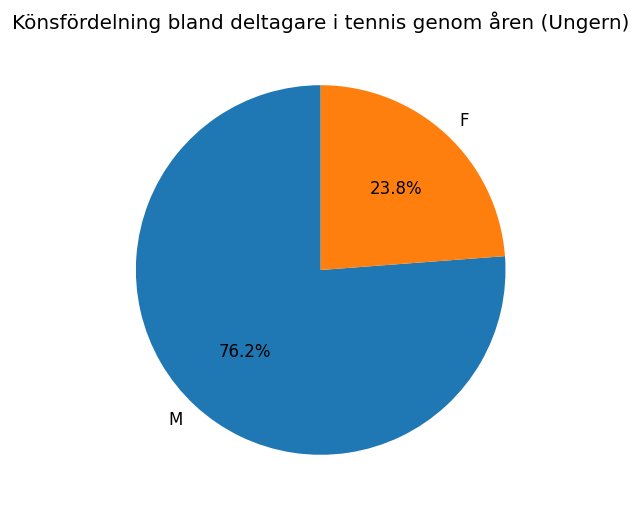

In [ ]:
gender_counts_tennis_hungary = hungary_unique['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts_tennis_hungary.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare i tennis genom åren (Ungern)")
plt.ylabel("")  # ta bort y-etikett
plt.show()

In [ ]:
Diagram över könsfördelningen i tennis (Sverige)

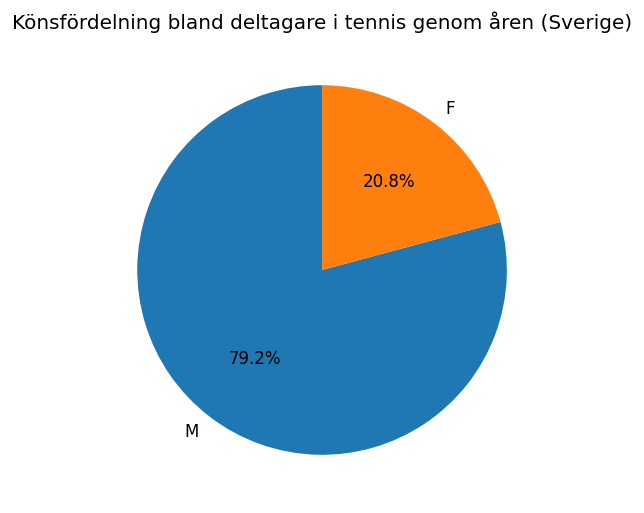

In [75]:
gender_counts_tennis_sweden = sweden_unique['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts_tennis_sweden.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare i tennis genom åren (Sverige)")
plt.ylabel("")  # ta bort y-etikett
plt.show()

**UPPGIFT 1** - 
Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med
hashfunktionen SHA-256.

In [6]:
import pandas as pd
import numpy as np
import hashlib

# 1) Läs in data
athletes = pd.read_csv("../athlete_events.csv")

# 2) Filtrera Ungern och ta en kopia (viktigt för att undvika SettingWithCopy)
hun = athletes.loc[athletes["NOC"] == "HUN"].copy()

# 3) Funktion för SHA-256-hash av namn (med valfri salt för bättre integritet)
def hash_name(name: str, salt: str = "") -> str:
    if pd.isna(name):
        return np.nan
    text = (salt + name.strip().lower()).encode("utf-8")
    return hashlib.sha256(text).hexdigest()

# Salt för hashning gör det svårare att knäcka hashen
SALT = "projekt_ungern_salt" 

# 4) Skapa hash-kolumn och ta bort originalnamn
hun.loc[:, "Name_hash"] = hun["Name"].map(lambda x: hash_name(x, SALT))
hun = hun.drop(columns=["Name"])  # om du vill helt anonymisera

# 5) (Valfritt) Spara som ny fil
hun.to_csv("hungary_anonymized.csv", index=False)

# 6) Snabb koll
print(hun[["NOC", "Name_hash"]].head())
print("Antal unika hashade individer:", hun["Name_hash"].nunique())


     NOC                                          Name_hash
208  HUN  1654f641e0ba956041d97676262995597e834bc8433cd8...
209  HUN  69a092c0a0ba34c8620c23340af70bd066b00d0d544030...
210  HUN  69a092c0a0ba34c8620c23340af70bd066b00d0d544030...
884  HUN  05f99743e5f4f1a53afcbd4f6d9f7bfb1f771cd7f7c1c7...
885  HUN  05f99743e5f4f1a53afcbd4f6d9f7bfb1f771cd7f7c1c7...
Antal unika hashade individer: 2681


Undersök därefter hur det gått för landet i OS genom tiderna. Visualisera exempelvis:  
- de sporter landet fått flest medaljer i  
- antal medaljer per OS
- histogram över åldrar
- Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS.

Se hur många medlajer ungerska deltagere tagit genom åren:

In [ ]:

# Medalj-data (per idrottare)
hun_medals = hungary_unique.dropna(subset=["Medal"]).copy()

# Medalj-data unika per event/OS (undviker dubbelräkning i lag/grenar)
# En "unik medalj" definieras som kombination av Games + Event + Medal + NOC
hun_unique_medals = (
    hun_medals.drop_duplicates(subset=["Games", "Event", "Medal", "NOC"])
    .copy()
)

print(f"Antal medaljer (idrottare-räknat): {len(hun_medals)}")
print(f"Antal unika medaljer (event/OS-räknat): {len(hun_unique_medals)}")


Antal medaljer (idrottare-räknat): 781
Antal unika medaljer (event/OS-räknat): 394


Exempel:

Om Ungerns herrlag i vattenpolo tar 1 guld, och laget består av 13 spelare,
→ Då finns 13 rader i datasetet (en per idrottare),
→ Alla med Medal = "Gold" och Sport = "Water Polo".
→ Då blir det 13 medaljer i vattenpolo i den här beräkningen.

Det visar hur många individer som fått medalj i varje sport.
Bra för att se:

Hur många idrottare som faktiskt har fått medalj

Hur stort deltagandet i medaljgrenar varit

Men inte bra för att jämföra länder eller sporter rättvist (lagidrotter överrepresenterade).


Samma exempel:

Ungerns herrlag i vattenpolo tar 1 guld
→ även om 13 spelare står med i filen,
→ så räknas det bara som 1 guld.

Det visar hur många faktiska medaljer Ungern har vunnit i varje sport.
Bra för att se:

Landets verkliga OS-medaljresultat (som i medaljtabeller)

Jämförelser mellan länder och sporter

Sporter Ungern tagit flest medaljer i (alla deltagere räknat(alla i ett lag räknas) och per event(lagsporter räknas som en))

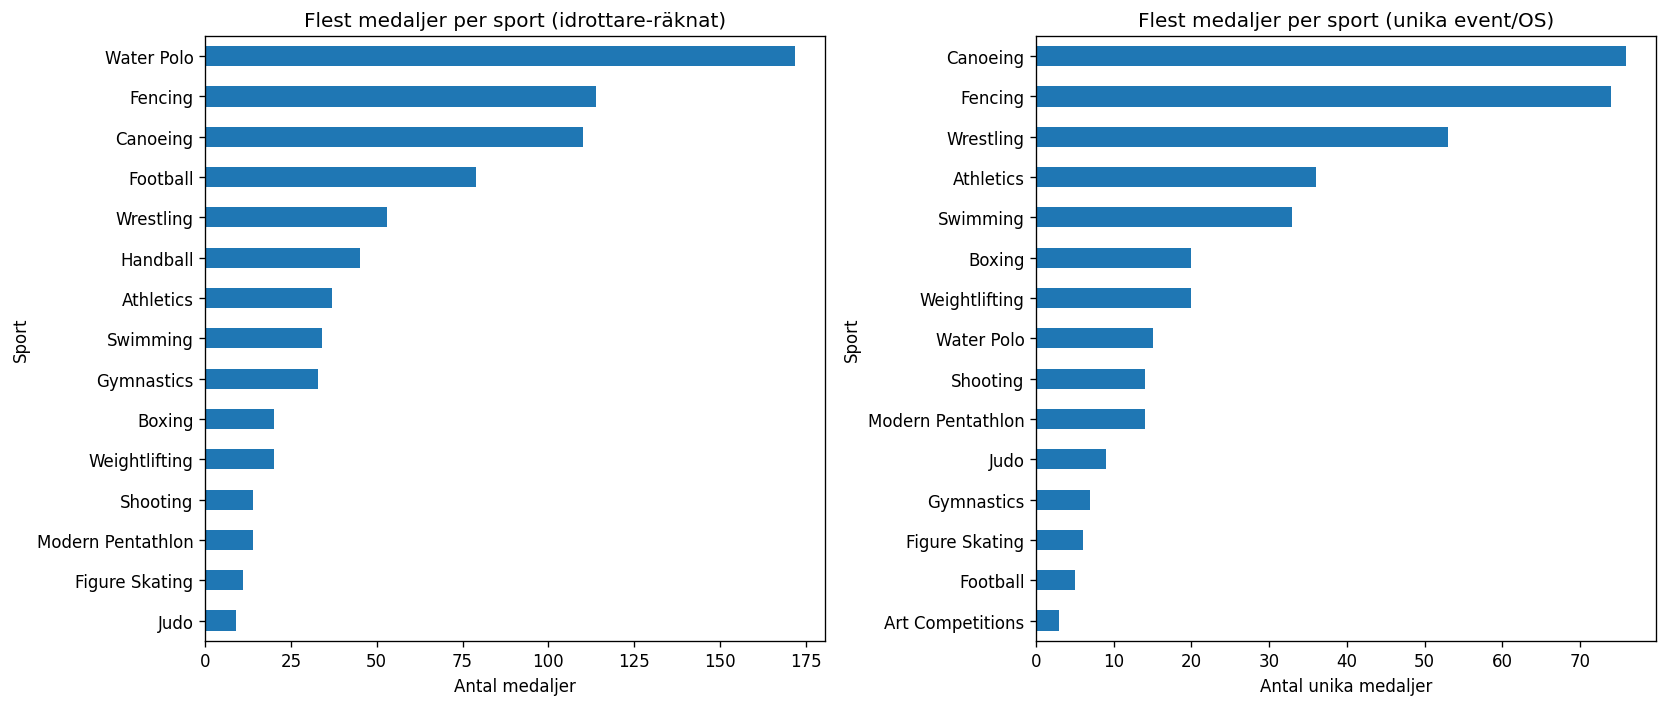

In [115]:
# Alla lagmedlemmar räknas. 
medals_by_sport_athlete = (
    hun_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
)

# Unika medaljer (per event/OS) ---
medals_by_sport_unique = (
    hun_unique_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
)


# Plottar båda för att se skillnaden
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
medals_by_sport_athlete.head(15).plot(kind="barh", ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title("Flest medaljer per sport (idrottare-räknat)")
axes[0].set_xlabel("Antal medaljer")

medals_by_sport_unique.head(15).plot(kind="barh", ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title("Flest medaljer per sport (unika event/OS)")
axes[1].set_xlabel("Antal unika medaljer")

plt.tight_layout()
plt.show()



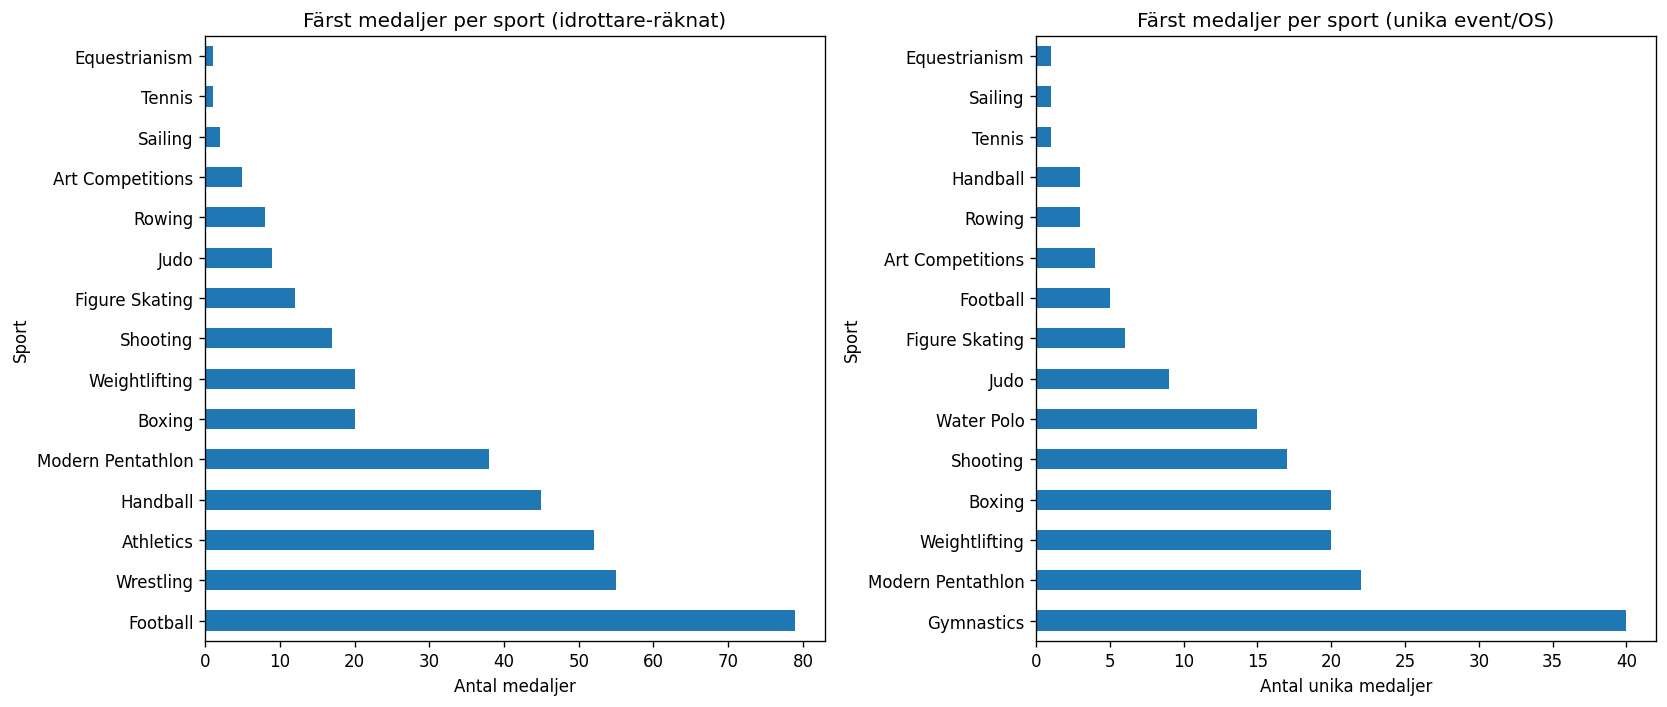

In [9]:
# --- A) Idrottare-räknat (kan dubbelräkna lag) ---
medals_by_sport_athlete = (
    hun_medals.groupby("Sport")["Medal"].count().sort_values(ascending=True)
)

# --- B) Unika medaljer (per event/OS) ---
medals_by_sport_unique = (
    hun_unique_medals.groupby("Sport")["Medal"].count().sort_values(ascending=True)
)

# Plotta båda för att se skillnaden
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
medals_by_sport_athlete.head(15).plot(kind="barh", ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title("Färst medaljer per sport (idrottare-räknat)")
axes[0].set_xlabel("Antal medaljer")

medals_by_sport_unique.head(15).plot(kind="barh", ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title("Färst medaljer per sport (unika event/OS)")
axes[1].set_xlabel("Antal unika medaljer")

plt.tight_layout()
plt.show()

In [12]:
hungary.info()
hungary.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6607 entries, 208 to 271020
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6607 non-null   int64  
 1   Name    6607 non-null   object 
 2   Sex     6607 non-null   object 
 3   Age     6461 non-null   float64
 4   Height  4726 non-null   float64
 5   Weight  4740 non-null   float64
 6   Team    6607 non-null   object 
 7   NOC     6607 non-null   object 
 8   Games   6607 non-null   object 
 9   Year    6607 non-null   int64  
 10  Season  6607 non-null   object 
 11  City    6607 non-null   object 
 12  Sport   6607 non-null   object 
 13  Event   6607 non-null   object 
 14  Medal   1135 non-null   object 
 15  region  6607 non-null   object 
 16  notes   0 non-null      object 
dtypes: float64(3), int64(2), object(12)
memory usage: 929.1+ KB


,ID,Age,Height,Weight,Year
count,6607.00000,6461.000000,4726.000000,4740.000000,6607.000000
mean,69123.15983,25.359078,175.881507,71.660232,1969.164825
std,37733.06245,6.120854,10.531300,15.358222,29.869196
min,99.00000,12.000000,144.000000,35.000000,1896.000000
25%,38966.00000,21.000000,169.000000,61.000000,1952.000000
50%,63600.00000,25.000000,176.000000,70.000000,1972.000000
75%,103524.00000,28.000000,184.000000,80.000000,1992.000000
max,135526.00000,58.000000,209.000000,160.000000,2016.000000


In [13]:
# --- a. Hur många länder som är med i datan ---
num_countries = data.nunique()
print(f"a) Antal länder: {num_countries}")

a) Antal länder: ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
region       205
notes         21
dtype: int64


In [14]:
# --- b. Vilka länder är med (förkortningarna räcker) ---
countries = athletes['NOC'].unique()
print("b) Länder (NOC-förkortningar):")
print(countries)

b) Länder (NOC-förkortningar):
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' '

In [15]:
# --- c. Vilka sporter är med ---
sports = athletes['Sport'].unique()
print(f"c) Antal sporter: {len(sports)}")
print(sports)

c) Antal sporter: 66
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [16]:
# --- d. Vilka medaljtyper finns det ---
medals = athletes['Medal'].dropna().unique()
print(f"d) Medaljtyper: {medals}")

d) Medaljtyper: ['Gold' 'Bronze' 'Silver']


In [17]:
# --- e. Statistik för åldern ---
age_stats = athletes['Age'].describe()
print("e) Statistik för ålder:")
print(age_stats[['mean', '50%', 'min', 'max', 'std']])

e) Statistik för ålder:
mean    25.556898
50%     24.000000
min     10.000000
max     97.000000
std      6.393561
Name: Age, dtype: float64


In [18]:
# --- f. Egna frågor ---
# Exempel: Vilket år hade flest deltagare?
participants_per_year = athletes.groupby('Year')['ID'].nunique()
print("f) År med flest deltagare:")
print(participants_per_year.sort_values(ascending=False).head())

f) År med flest deltagare:
Year
1992    11183
2016    11179
2008    10899
2000    10647
2004    10557
Name: ID, dtype: int64


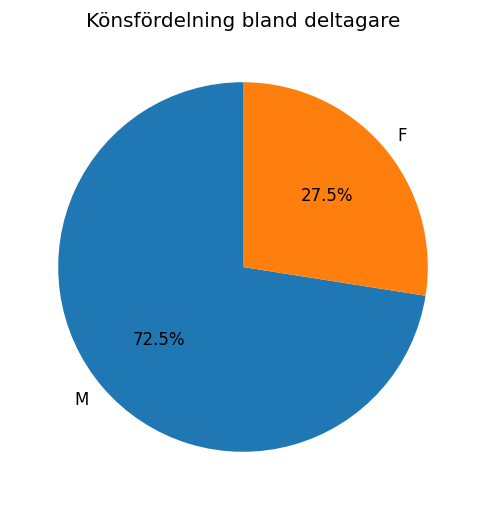

In [19]:
# --- g. Diagram över könsfördelningen ---
gender_counts = athletes['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare")
plt.ylabel("")  # ta bort y-etikett
plt.show()

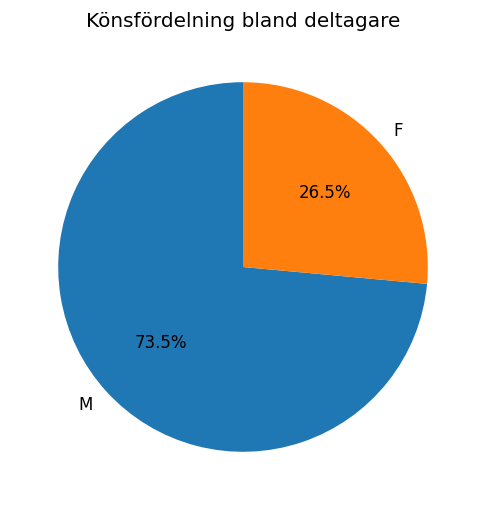

In [20]:
gender_counts = hungary['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare")
plt.ylabel("")  # ta bort y-etikett
plt.show()

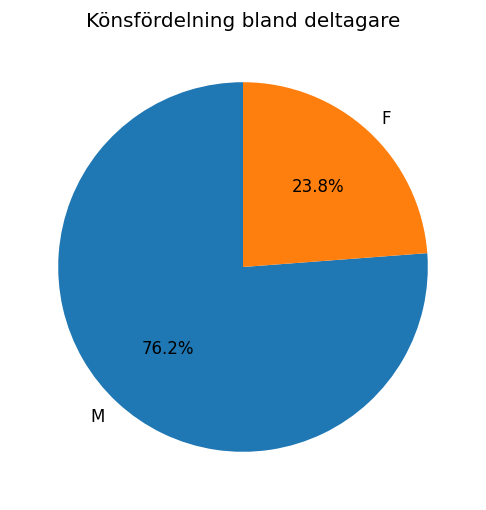

In [21]:
gender_counts = sweden['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare")
plt.ylabel("")  # ta bort y-etikett
plt.show()

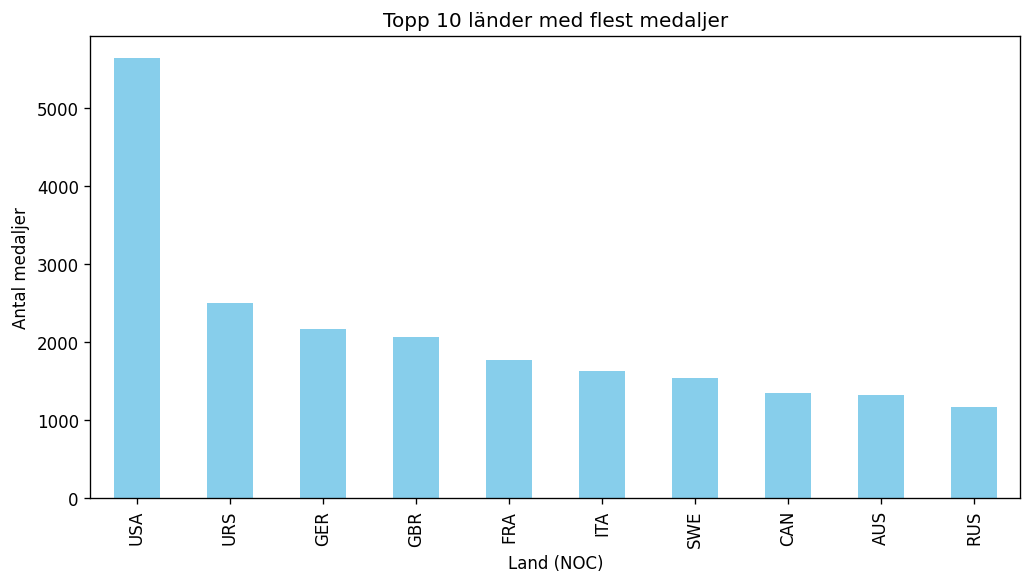

In [22]:
medal_counts = athletes.dropna(subset=['Medal']).groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
medal_counts.plot(kind='bar', color='skyblue')
plt.title("Topp 10 länder med flest medaljer")
plt.xlabel("Land (NOC)")
plt.ylabel("Antal medaljer")
plt.show()

Antal ungerska deltagare per OS

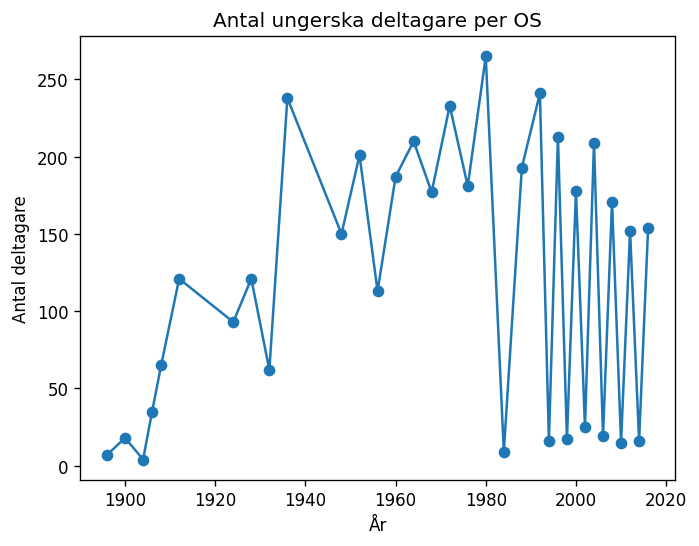

In [23]:
yearly_counts = hungary.groupby('Year')['ID'].nunique()
yearly_counts.plot(kind='line', marker='o')
plt.title("Antal ungerska deltagare per OS")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.show()

In [ ]:
import plotly.express as px

yearly_counts = hungary.groupby('Year')['ID'].nunique().reset_index()

fig = px.line(
    yearly_counts,
    x='Year',
    y='ID',
    markers=True,
    title="Antal ungerska deltagare per OS"
)

fig.update_layout(
    xaxis_title="År",
    yaxis_title="Antal deltagare"
)

fig.show()


ModuleNotFoundError: No module named 'plotly_express'

Antal svenska deltagare per OS

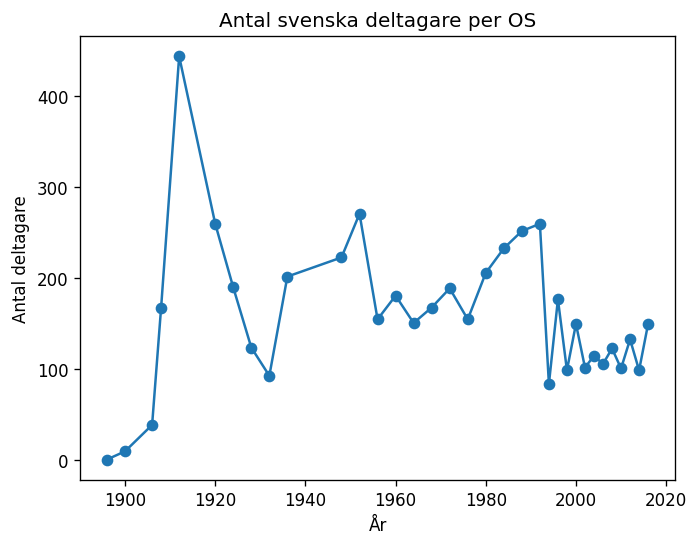

In [24]:
yearly_counts = sweden.groupby('Year')['ID'].nunique()
yearly_counts.plot(kind='line', marker='o')
plt.title("Antal svenska deltagare per OS")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.show()

Antal medaljer 

In [25]:
hungary[hungary['Medal'] == 0].shape[0]
hungary['Medal'].value_counts() 

Medal
Gold      432
Bronze    371
Silver    332
Name: count, dtype: int64

Antal medaljer per år

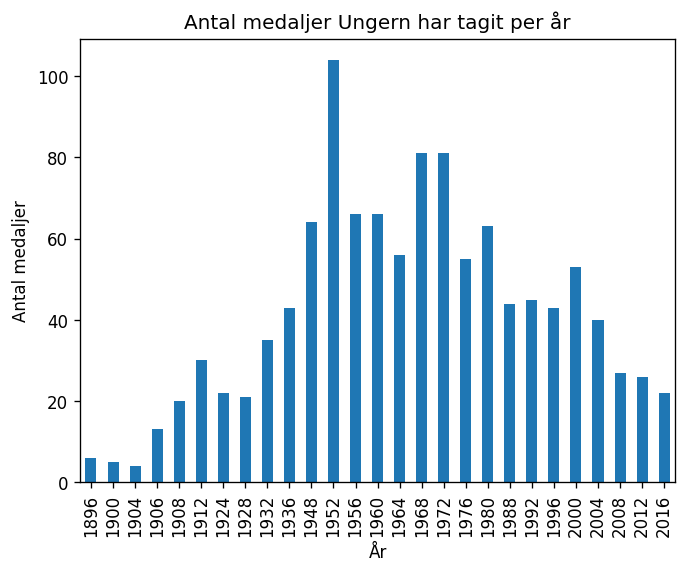

In [26]:
medals = hungary[hungary['Medal'].notna()]
medal_per_year = medals.groupby('Year')['Medal'].count()

medal_per_year.plot(kind='bar')
plt.title("Antal medaljer Ungern har tagit per år")
plt.xlabel("År")
plt.ylabel("Antal medaljer")
plt.show()